In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, subplot, title, axis, show, imread, imshow
from scipy.fft import fft, fft2, ifft, ifft2, fftshift, ifftshift, rfft2
from scipy.signal import gaussian, convolve2d
import time

font = {'fontname': 'Times New Roman'}

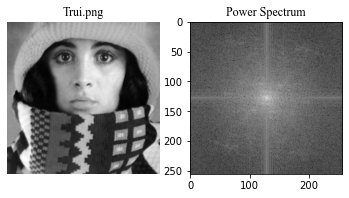

In [87]:
I = imread('trui.png')

#compute the Fourier transform
ftI = fft2(I, norm = 'forward')
pI = np.abs(ftI) ** 2
I2 = fftshift(pI)

subplot(121)
imshow(I, cmap = 'gray')
title('Trui.png', **font)
axis('off')

subplot(122)
imshow(np.log(I2), cmap = 'gray')
title('Power Spectrum', **font)

show()

In [88]:
def gauss_kernel_2d(sigma, N = None):
    if N == None:
        N = 3 * sigma
    N = int(np.floor(N))
    gauss1, gauss2 = gaussian(N, sigma), gaussian(N, sigma)
    return np.outer(gauss1, gauss2)

#Convolves an image. The old fashioned way.
def convolve(kernel, image):
    t1 = time.time()
    imwidth, imheight = image.shape
    kern_width, kern_height = kernel.shape
    size = kern_width // 2
    convolved_image = np.zeros(image.shape)
    image_pad = np.pad(image, size)
    
    for i in range(imwidth):
        for j in range(imheight):
            convolved_image[i,j] = np.sum(image[i:i + kern_width,j:j + kern_height])
            
    t2 = time.time()
    return convolved_image[size:-size, size:-size], t2 - t1

#Convolves by convolution theorem
def fconvolve(kernel, image):
    t1 = time.time()
    kernel_pad = np.zeros(image.shape)
    kernel_pad[(kernel_pad.shape[0] - kernel.shape[0]) // 2:
               (kernel_pad.shape[0] + kernel.shape[0]) // 2,
               (kernel_pad.shape[1] - kernel.shape[1]) // 2:
               (kernel_pad.shape[1] + kernel.shape[1]) // 2] = kernel
    Fim = fft2(image)
    Fkernel = fft2(kernel_pad)
    
    convolved = ifft2(np.multiply(Fim, Fkernel))
    convolved_shift = fftshift(np.abs(convolved) ** 2)
    
    t2 = time.time()
    return convolved_shift, t2 - t1

In [89]:
kernel = gauss_kernel_2d(2)

cIm, t1 = convolve(kernel, I)
fIm, t2 = fconvolve(kernel, I)

print('Regular:', t1, 'FFT:', t2)

Regular: 0.2799718379974365 FFT: 0.0035369396209716797


In [90]:
#making some data
ctimes = np.zeros(20)
ftimes = np.zeros(20)

for i in range(20):
    print(i)

    kernel = gauss_kernel_2d(i)
    
    cIm, t1i = convolve(kernel, I)
    fIm, t2i = fconvolve(kernel, I)
    
    ctimes[i] = t1i
    ftimes[i] = t2i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [91]:
print(ftimes, ctimes)

[0.00235701 0.0017159  0.00193095 0.00176501 0.00159621 0.00161815
 0.00161195 0.00163198 0.00160408 0.00161099 0.00155306 0.00158334
 0.00160098 0.00161791 0.00170398 0.00268078 0.00163412 0.00159311
 0.00298405 0.00161099] [0.22327495 0.23678517 0.24001598 0.24409223 0.24762201 0.25343108
 0.25048304 0.25301766 0.2671361  0.26921105 0.27199411 0.27747297
 0.28205109 0.28620791 0.29274082 0.30166197 0.29948592 0.30921721
 0.31266212 0.32097292]


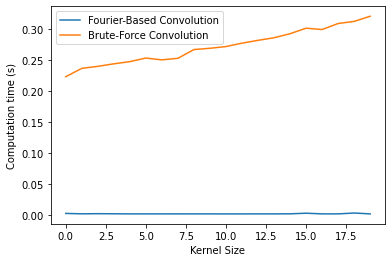

In [92]:
fig1 = plt.figure()

plot(ftimes, label = 'Fourier-Based Convolution')
plot(ctimes, label = 'Brute-Force Convolution')
plt.legend()
plt.xlabel('Kernel Size')
plt.ylabel('Computation time (s)')

show()

fig1.savefig('Figure3.1.jpg', dpi = 1200)

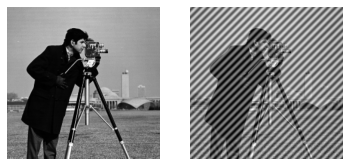

In [93]:
I = imread('cameraman.tif')
I = (I / 255).astype('float64')

def add_wave(im, a0, v0, w0):
    return np.array([[im[x,y] + a0*np.cos(v0 * x + w0 * y) 
            for y in range(im.shape[1])] 
             for x in range(im.shape[0])])

Iwave = add_wave(I, 0.5, 0.5, 0.5)

fig2 = plt.figure()

subplot(121)
imshow(I, cmap = 'gray')
axis('off')
subplot(122)
imshow(Iwave,cmap = 'gray')
axis('off')
show()

fig2.savefig('Figure3.2.jpg', dpi = 1200)

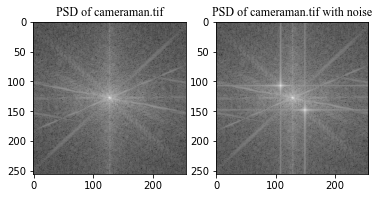

In [94]:
f = fft2(Iwave)
shift = fftshift(f)
PSDf = np.abs(shift) ** 2


fI = fft2(I)
pI = np.abs(fI) ** 2
PSDI = fftshift(pI)

fig3 = plt.figure()

subplot(121)
imshow(np.log(PSDI), cmap = 'gray')
title('PSD of cameraman.tif', **font)
subplot(122)
imshow(np.log(PSDf), cmap = 'gray')
title('PSD of cameraman.tif with noise', **font)

show()

fig3.savefig('Figure3.3.jpg', dpi = 1200)

In [95]:
zeros = add_wave(np.zeros(I.shape), 0.5,0.5,0.5)

PSDzeros = np.real(fftshift(np.abs(fft2(zeros))**2))

vals = np.sort(PSDzeros.flatten())

In [96]:
zeros2 = np.copy(PSDf)

rows, cols = zeros2.shape

peaks = []

for i in range(rows):
    for j in range(cols):
        if zeros2[i,j] >= vals[-3] and zeros2[i,j] < vals[-1]:
            print(i,j)
            peaks.append([i,j])
            #zeros2[i - 1000:i + 1000,j-2:j+2] = 0.001
            #zeros2[i-2:i+2, j-1000:j+1000] = 0.001

#fig5 = plt.figure()            

#imshow(np.log(zeros2), cmap = 'gray')

#fig5.savefig('Figure3.5.jpg', dpi = 1200)

108 108
148 148


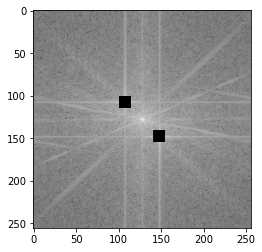

In [97]:
shift2 = np.copy(shift)

peak0, peak1 = peaks

i,j = peak0
k,l = peak1

rows, cols = shift2.shape

shift2[peak0[0] - 7:peak0[0] + 7, peak0[1] - 7:peak0[1] + 7] = 0.001
shift2[peak1[0] - 7:peak1[0] + 7, peak1[1] - 7:peak1[1] + 7] = 0.001

#shift2[i - 1000:i + 1000,j-1:j+1] = 0.001
#shift2[i-1:i+1, j-1000:j+1000] = 0.001
#shift2[k - 1000:k + 1000,l-1:l+1] = 0.001
#shift2[k-1:k+1, l-1000:l+1000] = 0.001

        
    
    
    
imshow(np.log(np.abs(shift2) ** 2), cmap = 'gray')

In [98]:
inv_shift = ifftshift(shift2)
img_recon = np.real(ifft2(inv_shift))

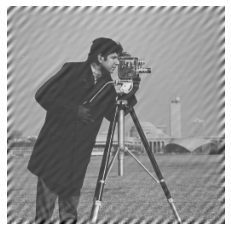

In [99]:
imshow(img_recon,cmap = 'gray')
axis('off')
show()
